#Import Libraries





In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inline plot display in Jupyter Notebook
%matplotlib inline

#Load Data

In [2]:
df = pd.read_csv('/content/height-weight.csv')

# Display the first few rows of the data
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#Data Exploration

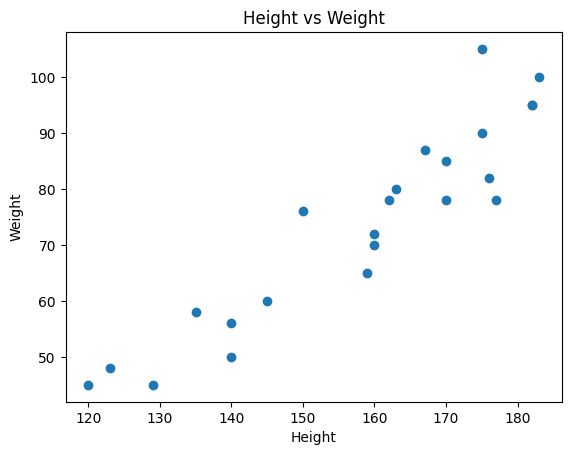

In [3]:
# Scatter plot to visualize the relationship between height and weight
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

#Data Preparation

In [4]:
# Separate independent (features) and dependent (target) variables
X = df.iloc[:, :-1].values  # All columns except the last (Weight)
y = df.iloc[:, 1].values  # Weight column

In [7]:
# Split data into training and testing sets (80% training, 20% testing)
# Set a random state for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print("Shape of the original dataset:", X.shape)
print("Shape of the training set:", X_train.shape)
print("Shape of the testing set:", X_test.shape)

Shape of the original dataset: (23, 1)
Shape of the training set: (18, 1)
Shape of the testing set: (5, 1)


In [10]:
# Standardize the features (optional but recommended for linear regression)
# Standardization scales the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

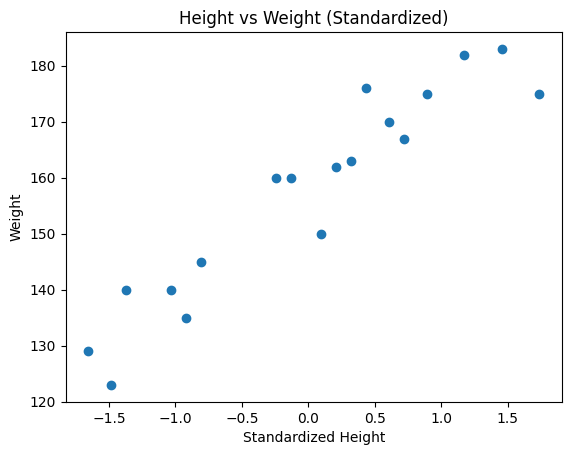

In [11]:
# Visualize the standardized features
plt.scatter(X_train, Y_train)
plt.xlabel('Standardized Height')
plt.ylabel('Weight')
plt.title('Height vs Weight (Standardized)')
plt.show()

#Model Training

In [12]:
# Create a linear regression model
model = LinearRegression()

In [13]:
# Train the model on the training data
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
# Get the model coefficients (slope) and intercept (bias)
print("Coefficient (slope):", model.coef_)
print("Intercept (bias):", model.intercept_)

Coefficient (slope): [17.03440872]
Intercept (bias): 157.5


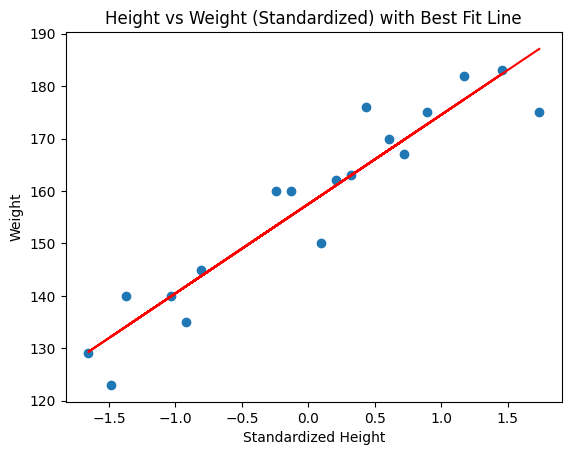

In [16]:
# Plot the best fit line on the training data
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='red')  # Best fit line
plt.xlabel('Standardized Height')
plt.ylabel('Weight')
plt.title('Height vs Weight (Standardized) with Best Fit Line')
plt.show()

#Prediction and Evaluation

In [17]:
# Make predictions on the testing data
Y_pred_test = model.predict(X_test)

In [18]:
# Print the predicted vs actual values
print("Predicted vs Actual Values (Testing Data)")
print(Y_pred_test[:10], Y_test[:10])  # Display the first 10 predictions

Predicted vs Actual Values (Testing Data)
[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414] [177 170 120 182 159]


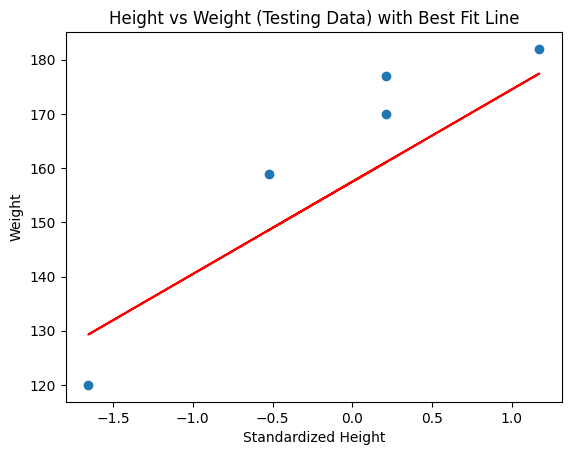

In [19]:
# Visualize the model performance on the testing data
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel('Standardized Height')
plt.ylabel('Weight')
plt.title('Height vs Weight (Testing Data) with Best Fit Line')
plt.show()

In [20]:
# Calculate performance metrics

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred_test)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 109.77592599051664
Mean Absolute Error (MAE): 9.822657814519232
Root Mean Squared Error (RMSE): 10.477400726827081


In [21]:
# R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, Y_pred_test)
print("R-squared:", r2)

R-squared: 0.776986986042344


In [22]:
# Prediction for a new height value (90)
scaled_weight = scaler.transform([[90]])  # Standardize the new data point
predicted_weight = model.predict(scaled_weight)
print(f"Predicted Weight for Height 90: {predicted_weight}")

Predicted Weight for Height 90: [172.64122168]
